In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
circuits = pd.read_csv('../data/raw/circuits.csv')
constructor_results = pd.read_csv('../data/raw/constructor_results.csv')
constructor_standings = pd.read_csv('../data/raw/constructor_standings.csv')
constructors = pd.read_csv('../data/raw/constructors.csv')
driver_standings = pd.read_csv('../data/raw/driver_standings.csv')
drivers = pd.read_csv('../data/raw/drivers.csv', parse_dates=[6])
lap_times = pd.read_csv('../data/raw/lap_times.csv')
pit_stops = pd.read_csv('../data/raw/pit_stops.csv')
qualifying = pd.read_csv('../data/raw/qualifying.csv')
races = pd.read_csv('../data/raw/races.csv', parse_dates=[5])
results = pd.read_csv('../data/raw/results.csv')
seasons = pd.read_csv('../data/raw/seasons.csv')
status = pd.read_csv('../data/raw/status.csv')

In [9]:
df = pd.merge(results,races[['raceId','year', 'name','round']],on='raceId', how='left')
df = pd.merge(df,drivers[['driverId','driverRef', 'nationality']],on='driverId', how='left')
df = pd.merge(df,constructors[['constructorId', 'name','nationality']],on='constructorId', how='left')

In [11]:
df.rename(columns={'rank': 'fastest_lap_rank', 'name_x': 'gp_name', 'nationality_x': 'driver_nationality', 'name_y': 'constructor_name', 'nationality_y': 'constructor_nationality', 'driver_ref': 'driver'}, inplace=True)

In [17]:
df = df.sort_values(by=['year', 'round','positionOrder'], ascending = [False, True, True])

In [18]:
df.reset_index(drop = True, inplace=True)

In [22]:
df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'fastest_lap_rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'gp_name', 'round', 'driverRef',
       'driver_nationality', 'constructor_name', 'constructor_nationality'],
      dtype='object')

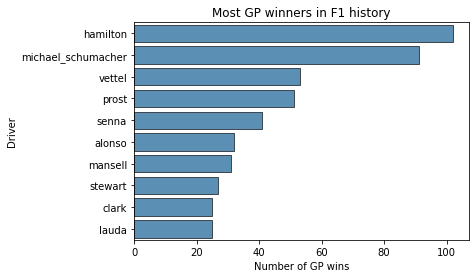

In [37]:
# drivers top 10 most wins
driver_racewins_count = df.loc[df['positionOrder'] == 1].groupby('driverRef')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()
base_color = sb.color_palette()[0]
sb.barplot(data = driver_racewins_count.head(10), y = 'driverRef', x = 'positionOrder', color = base_color, alpha = 0.8, linewidth=.8, edgecolor="black")
plt.title('Most GP winners in F1 history')
plt.ylabel('Driver')
plt.xlabel('Number of GP wins');

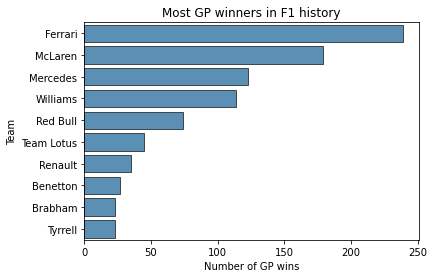

In [39]:
# constructor teams top 10 most wins
driver_racewins_count = df.loc[df['positionOrder'] == 1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()
base_color = sb.color_palette()[0]
sb.barplot(data = driver_racewins_count.head(10), y = 'constructor_name', x = 'positionOrder', color = base_color, alpha = 0.8, linewidth=.8, edgecolor="black")
plt.title('Most GP winners in F1 history')
plt.ylabel('Team')
plt.xlabel('Number of GP wins');